### Auxiliary functions

In [8]:
def plot_surface(clf, X, y,
                 xlim=(-10, 10), ylim=(-10, 10), n_steps=250,
                 subplot=None, show=True):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                         np.linspace(ylim[0], ylim[1], n_steps))

    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    if show:
        plt.show()


# Scikit-Learn (sklearn)
[Sklearn](https://scikit-learn.org/stable/) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

Similar to Numpy and Pandas, in order to be able to use Sklearn, we need to import the corresponding packages.

In [9]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["figure.max_open_warning"] = -1

Sklearn provide [several methods](https://scikit-learn.org/stable/datasets/sample_generators.html) for generating synthetic datasets. Below, we use the method `make_blobs`, which generates data from isotropic Gaussians with mean values taken at random in the interval [-10, 10].

In [28]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2, centers=20, random_state=11)


labels = ["b", "r"]
y = np.take(labels, (y < 10))
print(X[:5,:])
print(y[:5])
print("In the dataset there are", X.shape[0], "samples and each sample is represented by ", X.shape[1], "features")


[[  7.20766448  -3.05220886]
 [  5.19665219   2.09288536]
 [ -9.38910317  -8.55180991]
 [  6.75590071   4.96417342]
 [-10.12233986  -0.02540698]]
['b' 'b' 'r' 'r' 'b']
In the dataset there are 1000 samples and each sample is represented by  2 features


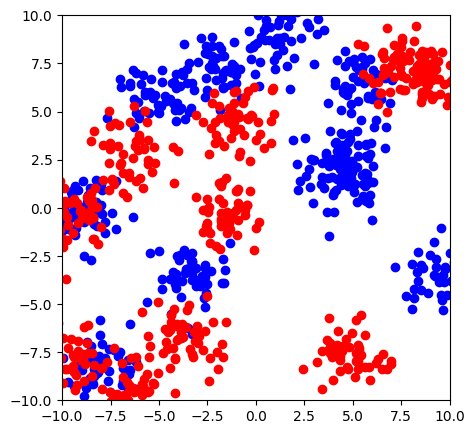

In [29]:
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

## Fitting a model and making predictions

Based on the sklearn API, all we need to do for fitting a model is to select the model we want (and import the corresponding package), set its parameters and use the method `fit`. After fitting the model, we can make prediction using the method `predict`, or `predict_proba` (for classification problems). Below, we use a [K nearest neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifier.

['b' 'b' 'r' 'r' 'b' 'b' 'b' 'b' 'b' 'b']

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]



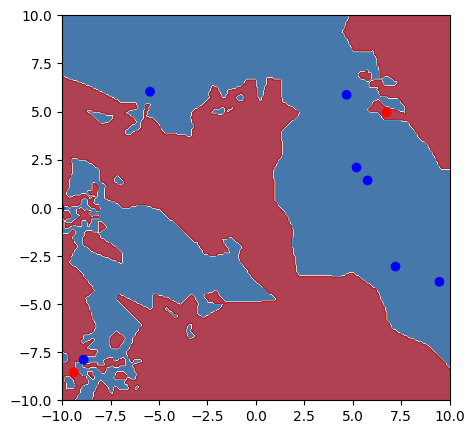

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y) # model fitting

class_pred = clf.predict(X[:10]) #predict the class

proba_pred = clf.predict_proba(X[:10])#predict the probability to belong to each class


print(class_pred)
print()
print(proba_pred)
print()



print(X[:10], y[:10])

plot_surface(clf, X[:10], y[:10])

Now, let's use a [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model. The process for fitting the model and making predictions is exactly the same.

['r' 'b' 'r' 'b' 'r' 'r' 'r' 'b' 'b' 'b']

[[0.46189862 0.53810138]
 [0.55258765 0.44741235]
 [0.3153093  0.6846907 ]
 [0.61007273 0.38992727]
 [0.46504411 0.53495589]
 [0.32754688 0.67245312]
 [0.45403892 0.54596108]
 [0.54177551 0.45822449]
 [0.62013185 0.37986815]
 [0.59287802 0.40712198]]



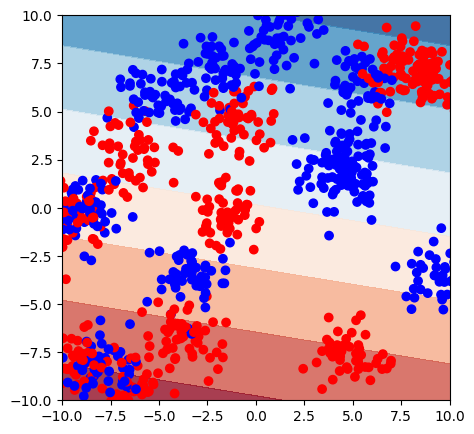

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
class_pred = clf.predict(X[:10])
proba_pred = clf.predict_proba(X[:10])
print(class_pred)
print()
print(proba_pred)
print()
plot_surface(clf, X, y)

And a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifier.

['b' 'b' 'r' 'r' 'b' 'b' 'b' 'b' 'b' 'b']

[[0.944 0.056]
 [1.    0.   ]
 [0.098 0.902]
 [0.246 0.754]
 [0.738 0.262]
 [0.732 0.268]
 [1.    0.   ]
 [1.    0.   ]
 [0.996 0.004]
 [0.952 0.048]]



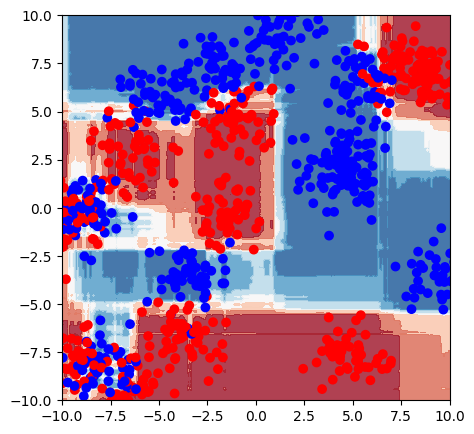

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X, y)
class_pred = clf.predict(X[:10])
proba_pred = clf.predict_proba(X[:10])
print(class_pred)
print()
print(proba_pred)
print()
plot_surface(clf, X, y)

And finally and [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) (we are living in the era of deep learning and neural networks are very popular).

['b' 'b' 'r' 'b' 'r' 'r' 'b' 'b' 'b' 'b']

[[9.99980360e-01 1.96397962e-05]
 [9.99901467e-01 9.85325816e-05]
 [3.24177743e-01 6.75822257e-01]
 ...
 [4.16552031e-01 5.83447969e-01]
 [1.50522013e-02 9.84947799e-01]
 [9.38907955e-01 6.10920448e-02]]



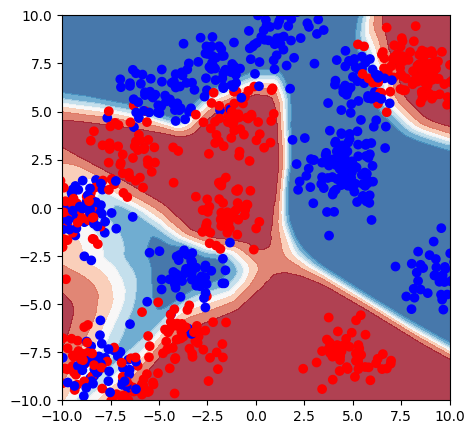

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation="relu", learning_rate="invscaling")
clf.fit(X, y)
class_pred = clf.predict(X[:10])
proba_pred = clf.predict_proba(X[:,:10])
print(class_pred)
print()
print(proba_pred)
print()
plot_surface(clf, X, y)

## Model evaluation

The objective of building a machine learning model is to make accurate predictions on unseen data. Therefeore, we should evaluate our models on a test set, which is different than the training set (the data we use to fit the models).

However, observing training set and test set performance gives useful insights for model's behavior.

### Training error

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)
print("Training error = {:.1f}%".format(100* zero_one_loss(y, clf.predict(X))))

Training error = 9.5%


### Testing error

To evaluate the testing error of a model, we first need to create two disjoints sets of data: one for fitting the model (training set) and one for testing the model (test set). The easiest way to do so is to follow the **holdout** validation scheme using the `train_test_split` method.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #25% of the data are used for testing, the rest for training purposes
clf.fit(X_train, y_train)
print("Training error = {:.1f}%".format(100* zero_one_loss(y_train, clf.predict(X_train))))
print("Testing error = {:.1f}%".format(100* zero_one_loss(y_test, clf.predict(X_test))))

Training error = 10.8%
Testing error = 15.6%


Another way to split the data into training and test sets is by following **K-fold cross validation** scheme using the `KFold` method.

Since K-fold cross validation involved several runs of the algorithms, it allows us to compute **statistics** and preform **significance tests** to compare different models.

In [ ]:
from sklearn.model_selection import KFold

scores_knn = []
scores_alt = []

for train, test in KFold(n_splits=10).split(X): #it return the indices for the training and test sets
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    clf_knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
    scores_knn.append(zero_one_loss(y_test, clf_knn.predict(X_test)))

    #clf_alt = LogisticRegression().fit(X_train, y_train)
    clf_alt = MLPClassifier(hidden_layer_sizes=(50, 50, 50), activation="relu", learning_rate="invscaling").fit(X_train, y_train)
    scores_alt.append(zero_one_loss(y_test, clf_alt.predict(X_test)))


print("KNN : Average cross validation error = {:.5f} +- {:.5f}".format(np.mean(scores_knn), np.std(scores_knn)))
print("ALT : Average cross validation error = {:.5f} +- {:.5f}".format(np.mean(scores_alt), np.std(scores_alt)))
print()

import scipy.stats as stats
s, p = stats.ttest_rel(scores_knn, scores_alt)
print('The probability the null hypothesis (the performance of the 2 models is the same) is {:.5f}'.format(p))

KNN : Average cross validation error = 0.14600 +- 0.03826
ALT : Average cross validation error = 0.13100 +- 0.04571

The probability the null hypothesis (the performance of the 2 models is the same) is 0.31200


In the example above, we can accept the null hypothesis (p-value=0.35 > 0.05) and conclude that the performance of the two models is(from a statistical point of view) the same.

## Metrics

The default metrics for regression is the **R-square** and for classification is **accuracy**. But we can use any of the available [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) using the sklearn API.

### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_train = (y_train == "r")
y_test = (y_test == "r")

clf_knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print("Accuracy =", accuracy_score(y_test, clf_knn.predict(X_test)))

Accuracy = 0.84


### Precision

In [ ]:
from sklearn.metrics import precision_score
print("Precision =", precision_score(y_test, clf_knn.predict(X_test)))

Precision = 0.8571428571428571


### Recall

In [ ]:
from sklearn.metrics import recall_score
print("Recall =", recall_score(y_test, clf_knn.predict(X_test)))

Recall = 0.782608695652174


### F1-score

In [ ]:
from sklearn.metrics import f1_score
print("F1 score =", f1_score(y_test, clf_knn.predict(X_test)))

F1 score = 0.8181818181818182


### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf_knn.predict(X_test))

array([[48,  6],
       [10, 36]])

###Model hyperparameters
For setting model hyperparameters need to observe training and test error. For doing so we can use the `validation_curve` method.

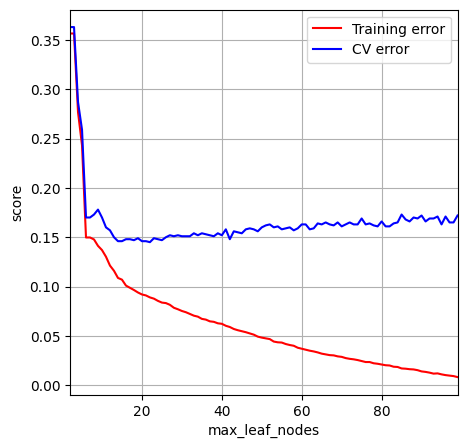

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

param_range = range(2, 100) #build a decision tree and decide on the number of leaf nodes. A grid is created and we fit/evaluate the model for each grid value.
param_name = "max_leaf_nodes"

train_scores, test_scores = validation_curve(DecisionTreeClassifier(),
                                             X, y,
                                             param_name=param_name,
                                             param_range=param_range,
                                             scoring="accuracy",
                                             cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.legend(loc="best")
plt.grid(True)

In the example above, a Decision Tree with 15 up to 22 leaf nodes performs the best since it achieves the lowest validation error. For more than 22 leaf nodes, the model starts overfitting the data.

Another way to find a good value for a hyperparameter is to search within a grid using the `GridSearchCV` method. It does exactly the same thing like above, but it prints the best parameter value: `Best parameters = {'max_leaf_nodes': 22}`.

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid={"max_leaf_nodes": list(range(2, 50))},
                    scoring="accuracy",
                    cv=5)
grid.fit(X, y)  # Note that GridSearchCV uses the fit method

print("Lowest error = %f, Best parameters = %s" % (1. - grid.best_score_, grid.best_params_))

Lowest error = 0.145000, Best parameters = {'max_leaf_nodes': 22}


## Transforming the data

In many cases we need to transform the data (e.g. standardizing or minmax normalization). We will see how we can do it by using the digits dataset from sklearn.

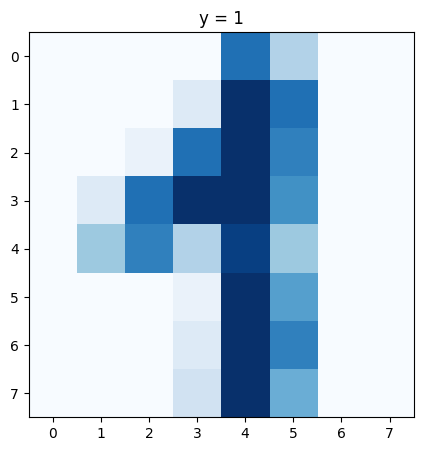

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sample_id = 42
plt.imshow(X[sample_id].reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.title("y = %d" % y[sample_id])
plt.show()

### Standardizing

Standardizing transforms the data such that for each feature the mean value is zero and its standard deviation 1. To do this tranformation we can use the `StandardScaler` method from sklearn.

In [ ]:
from sklearn.preprocessing import StandardScaler
tf = StandardScaler()
tf.fit(X_train, y_train)
Xt_train = tf.transform(X_train)
print("Mean (before scaling) =", np.mean(X_train))
print("Mean (after scaling) =", np.mean(Xt_train))

Mean (before scaling) = 4.8921213808463255
Mean (after scaling) = -2.307813265739004e-18


We can also resctrict the value of features to lie in a specifc range. In this case, we use the `MinMaxScaler` method. The default range for the `MinMaxScaler` is [0,1].

In [ ]:
from sklearn.preprocessing import MinMaxScaler
tf = MinMaxScaler()
tf.fit(X_train, y_train)
Xt_train = tf.transform(X_train)
print("Mean (before scaling) =", np.mean(X_train))
print("Mean (after scaling) =", np.mean(Xt_train))

Mean (before scaling) = 4.8921213808463255
Mean (after scaling) = 0.3077142902253391


### Feature selection

Feature selection using the backward feature elimination technique. It starts by using all the features to train a model. At each iteration it removes the least important feature (the one whose removal leads to the minimal increase in error) until we end up with a model with the desired (e.g., `n_features_to_select=10`) number of features.



Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

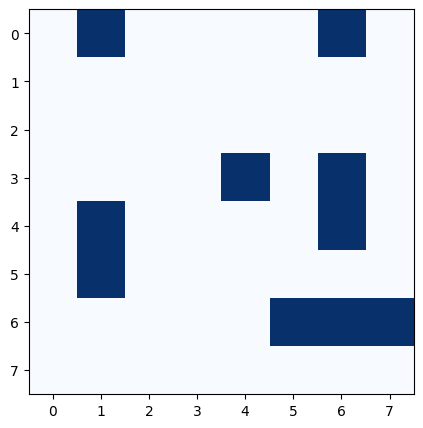

In [ ]:
from sklearn.feature_selection import RFE
tf = RFE(LogisticRegression(max_iter=5000, solver='liblinear'), n_features_to_select=10, verbose=1)
Xt = tf.fit_transform(X_train, y_train)
print("Shape =", Xt.shape)

plt.imshow(tf.get_support().reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.show()